<a href="https://www.kaggle.com/code/rohitnanaware17/grocery-store-eda-rohit-nanaware?scriptVersionId=220419305" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Grocery Store EDA

### Sharing my Grocery Sales Analysis project on Kaggle!  I'd love to hear your thoughts and insights on the data and visualizations.  
What other analyses would you find interesting?  Let's discuss! https://www.kaggle.com/code/rohitnanaware17/grocery-store-eda-rohit-nanaware/edit #PowerBI #DataAnalysis #GrocerySales #RetailAnalytics #Kaggle #DataCommunity


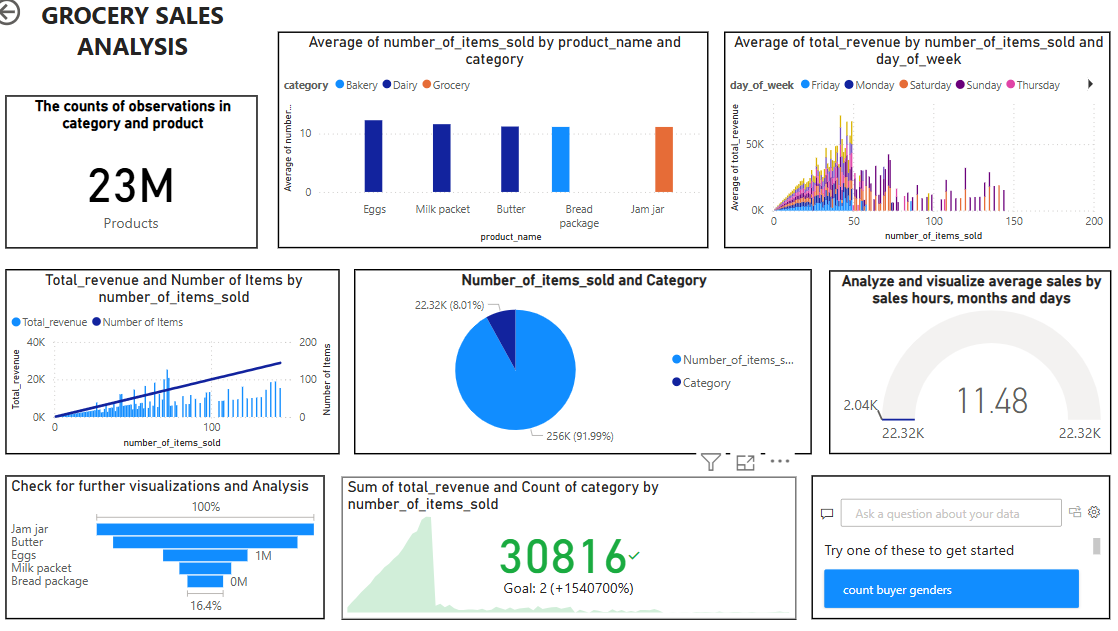

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grocery-sales-dataset-eda/Grocery_sales_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/grocery-sales-dataset-eda/Grocery_sales_dataset.csv',)
df
                

,Unnamed: 0,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men
...,...,...,...,...,...,...,...,...,...,...,...,...
22316,22316,Butter,Dairy,285,2023-11-30,Thursday,False,32,9120,08:55,1078,Women
22317,22317,Eggs,Dairy,134,2023-11-30,Thursday,False,28,3752,19:53,1041,Women
22318,22318,Bread package,Bakery,55,2023-11-30,Thursday,False,14,770,10:44,1011,Men
22319,22319,Jam jar,Grocery,350,2023-11-30,Thursday,False,8,2800,09:23,1091,Men


In [3]:
# value count day_of_week table
day_of_week = df['day_of_week'].value_counts()
print(day_of_week)

day_of_week
Sunday       5080
Saturday     4973
Tuesday      2560
Monday       2476
Thursday     2467
Wednesday    2414
Friday       2351
Name: count, dtype: int64


In [4]:
## Check Unique value
df['day_of_week'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [5]:
# replace holiday values by True / False
df['holiday']=df['holiday'].replace({False:"No", True:'Yes'})
df['holiday']

0        No
1        No
2        No
3        No
4        No
         ..
22316    No
22317    No
22318    No
22319    No
22320    No
Name: holiday, Length: 22321, dtype: object

In [6]:
df[['holiday','day_of_week']].head(1000)

,holiday,day_of_week
0,No,Thursday
1,No,Thursday
2,No,Thursday
3,No,Thursday
4,No,Thursday
...,...,...
995,No,Wednesday
996,No,Wednesday
997,No,Wednesday
998,No,Wednesday


In [7]:
df

,Unnamed: 0,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,0,Milk packet,Dairy,80,2022-09-01,Thursday,No,18,1440,07:58,1022,Men
1,1,Bread package,Bakery,55,2022-09-01,Thursday,No,8,440,12:00,1011,Men
2,2,Butter,Dairy,285,2022-09-01,Thursday,No,15,4275,19:56,1078,Women
3,3,Milk packet,Dairy,80,2022-09-01,Thursday,No,12,960,09:21,1022,Men
4,4,Bread package,Bakery,55,2022-09-01,Thursday,No,16,880,07:22,1011,Men
...,...,...,...,...,...,...,...,...,...,...,...,...
22316,22316,Butter,Dairy,285,2023-11-30,Thursday,No,32,9120,08:55,1078,Women
22317,22317,Eggs,Dairy,134,2023-11-30,Thursday,No,28,3752,19:53,1041,Women
22318,22318,Bread package,Bakery,55,2023-11-30,Thursday,No,14,770,10:44,1011,Men
22319,22319,Jam jar,Grocery,350,2023-11-30,Thursday,No,8,2800,09:23,1091,Men


### Checking Unique Values in tables

In [8]:
df['product_name'].unique()

array(['Milk packet', 'Bread package', 'Butter', 'Jam jar', 'Eggs'],
      dtype=object)

In [9]:
df['category'].unique()

array(['Dairy', 'Bakery', 'Grocery'], dtype=object)

In [10]:
df['price'].unique()

array([ 80,  55, 285, 350, 134])

In [11]:
df['sales_date'].unique()

array(['2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04',
       '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
       '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12',
       '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
       '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20',
       '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
       '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
       '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02',
       '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06',
       '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10',
       '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
       '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18',
       '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22',
       '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26',
       '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30',
       '2022-10-31', '2022-11-01', '2022-11-02', '2022-

In [12]:
df['day_of_week'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [13]:
df['holiday'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['number_of_items_sold'].unique()

array([ 18,   8,  15,  12,  16,  17,  11,   7,  10,  14,  19,   4,  13,
         9,   6,   2,   5,   3,   1,  21,  20,  22,  23,  24,  40,  27,
        34,  39,  37,  28,  67,  70,  87,  36,  30,  33,  48,  43,  32,
        46,  47,  26,  60,  54,  44,  42,  58, 132,  31,  64,  72,  52,
       129,  25,  38,  45,  78,  35,  51,  66,  69, 108,  29,  57,  41,
        49,  63,  55,  99,  61,  84,  93,  73, 123,  53,  96, 120, 138,
        75,  74, 114,  90, 117, 126,  56, 144, 111,  77, 135, 141,  82,
       107,  86, 105,  50,  97])

In [15]:
df['total_revenue'].unique()

array([ 1440,   440,  4275,   960,   880,  5950,  3850,  1995,   800,
        3990,  1474,  5415,   320,  6650,   715,   720,   640,  2565,
        1040,  1710,   330,   700,  1750,  1050,   134,  2412,  1520,
         570,  1425,   480,   350,  2144,  1742,  1680,  3500,   110,
         935,  1876,  2546,  1045,  2800,  1400,   990,  2850,   165,
         220,  3135,  2280,  1280,  1072,  4900,   938,  5250,  3420,
         268,   605,  1200,  2450,   240,  2278,   670,  5130,   385,
         536,  4550,  1360,   855,  2010,  3150,   804,   560,   402,
        1120,   770,  2100,  5600,   275,    80,   825,  1608,  1340,
         495,  4560,  1140,   550,   160,   400,  4200,    55,   660,
        4845,  6300,  3705,   285,  1206,  1600,  1760,  3082,  2948,
        2680,  3216,  2814,  6555,  5360,  7695,  1485,  2720,  2145,
        1840, 10545,  9800, 19950, 11658, 12600,  2400,  3618,  1870,
        2640,  5985,  6432,  1540, 15050,  9120,  6164,  3760,  1430,
        6270,  1980,

In [16]:
df['sales_time'].unique()

array(['07:58', '12:00', '19:56', '09:21', '07:22', '11:18', '16:24',
       '11:02', '09:32', '17:46', '09:43', '17:24', '07:39', '19:24',
       '07:38', '12:28', '08:05', '09:25', '19:20', '16:58', '09:01',
       '12:08', '17:57', '16:21', '12:02', '11:23', '08:14', '12:53',
       '18:58', '19:53', '08:03', '19:01', '12:22', '12:50', '08:11',
       '07:33', '15:06', '15:37', '19:33', '07:48', '13:43', '19:59',
       '10:03', '16:10', '08:10', '18:31', '07:34', '09:59', '09:50',
       '08:18', '15:23', '10:51', '16:02', '08:41', '15:41', '18:22',
       '16:15', '12:14', '09:03', '16:19', '14:11', '18:14', '19:30',
       '14:21', '13:17', '08:22', '08:00', '09:06', '19:22', '11:34',
       '08:08', '09:53', '17:09', '08:54', '15:31', '07:24', '15:54',
       '17:25', '07:07', '11:48', '10:06', '13:31', '13:22', '16:50',
       '09:46', '12:52', '15:21', '08:51', '07:40', '11:16', '14:19',
       '12:20', '12:10', '08:17', '16:32', '14:18', '10:14', '07:05',
       '17:02', '19:

In [17]:
df['product_id'].unique()

array([1022, 1011, 1078, 1091, 1041])

In [18]:
df['buyer_gender'].unique()

array(['Men', 'Women'], dtype=object)

In [19]:
df

,Unnamed: 0,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,0,Milk packet,Dairy,80,2022-09-01,Thursday,No,18,1440,07:58,1022,Men
1,1,Bread package,Bakery,55,2022-09-01,Thursday,No,8,440,12:00,1011,Men
2,2,Butter,Dairy,285,2022-09-01,Thursday,No,15,4275,19:56,1078,Women
3,3,Milk packet,Dairy,80,2022-09-01,Thursday,No,12,960,09:21,1022,Men
4,4,Bread package,Bakery,55,2022-09-01,Thursday,No,16,880,07:22,1011,Men
...,...,...,...,...,...,...,...,...,...,...,...,...
22316,22316,Butter,Dairy,285,2023-11-30,Thursday,No,32,9120,08:55,1078,Women
22317,22317,Eggs,Dairy,134,2023-11-30,Thursday,No,28,3752,19:53,1041,Women
22318,22318,Bread package,Bakery,55,2023-11-30,Thursday,No,14,770,10:44,1011,Men
22319,22319,Jam jar,Grocery,350,2023-11-30,Thursday,No,8,2800,09:23,1091,Men


In [20]:
# Drop table 
df = df.drop(['Unnamed: 0'], axis=1)
df

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,No,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,No,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,No,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,No,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,No,16,880,07:22,1011,Men
...,...,...,...,...,...,...,...,...,...,...,...
22316,Butter,Dairy,285,2023-11-30,Thursday,No,32,9120,08:55,1078,Women
22317,Eggs,Dairy,134,2023-11-30,Thursday,No,28,3752,19:53,1041,Women
22318,Bread package,Bakery,55,2023-11-30,Thursday,No,14,770,10:44,1011,Men
22319,Jam jar,Grocery,350,2023-11-30,Thursday,No,8,2800,09:23,1091,Men


In [21]:
df = df.drop(['product_id'], axis=1)
df

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,No,18,1440,07:58,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,No,8,440,12:00,Men
2,Butter,Dairy,285,2022-09-01,Thursday,No,15,4275,19:56,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,No,12,960,09:21,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,No,16,880,07:22,Men
...,...,...,...,...,...,...,...,...,...,...
22316,Butter,Dairy,285,2023-11-30,Thursday,No,32,9120,08:55,Women
22317,Eggs,Dairy,134,2023-11-30,Thursday,No,28,3752,19:53,Women
22318,Bread package,Bakery,55,2023-11-30,Thursday,No,14,770,10:44,Men
22319,Jam jar,Grocery,350,2023-11-30,Thursday,No,8,2800,09:23,Men


## Advanced Data Analysis


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1)Show the counts of observations in category and product

Text(0.5, 1.0, 'counts of observations in category and product')

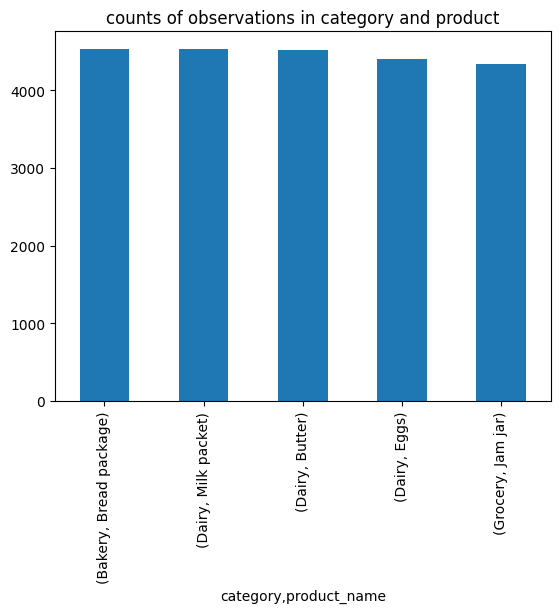

In [23]:
# using matplotlib
df.groupby('category')['product_name'].value_counts().plot(kind='bar')
plt.title('counts of observations in category and product')

<Axes: xlabel='product_name', ylabel='count'>

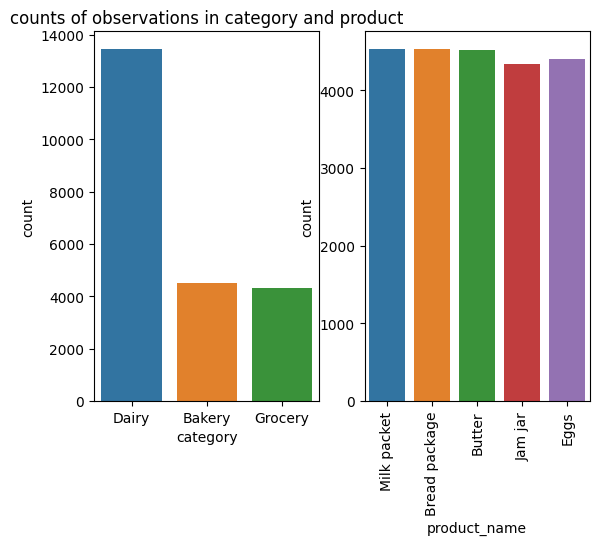

In [24]:
# using seaborn library

plt.subplot(1,2,1)
sns.countplot(data=df,x='category', )
plt.title('counts of observations in category and product')

plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.countplot(data=df,x='product_name')


### 2)Visualize average number of items sold for each category and product


/tmp/ipykernel_18/2525122619.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: xlabel='product_name', ylabel='number_of_items_sold'>

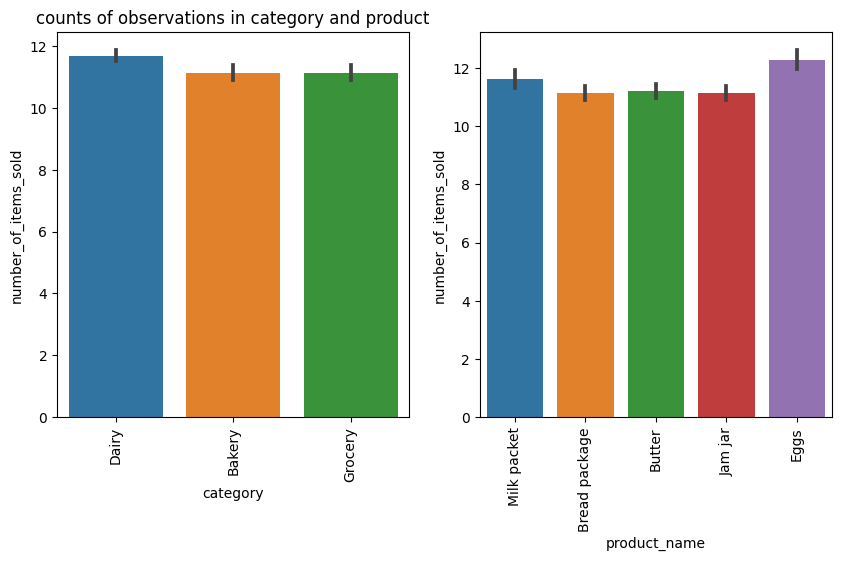

In [25]:
figure, axes = plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(data=df,x='category',y='number_of_items_sold' )
plt.title('counts of observations in category and product')
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.barplot(data=df,x='product_name',y='number_of_items_sold')


## 3)Visualize Average number of items sold and total revenue on each day

/tmp/ipykernel_18/2816680164.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: xlabel='total_revenue', ylabel='day_of_week'>

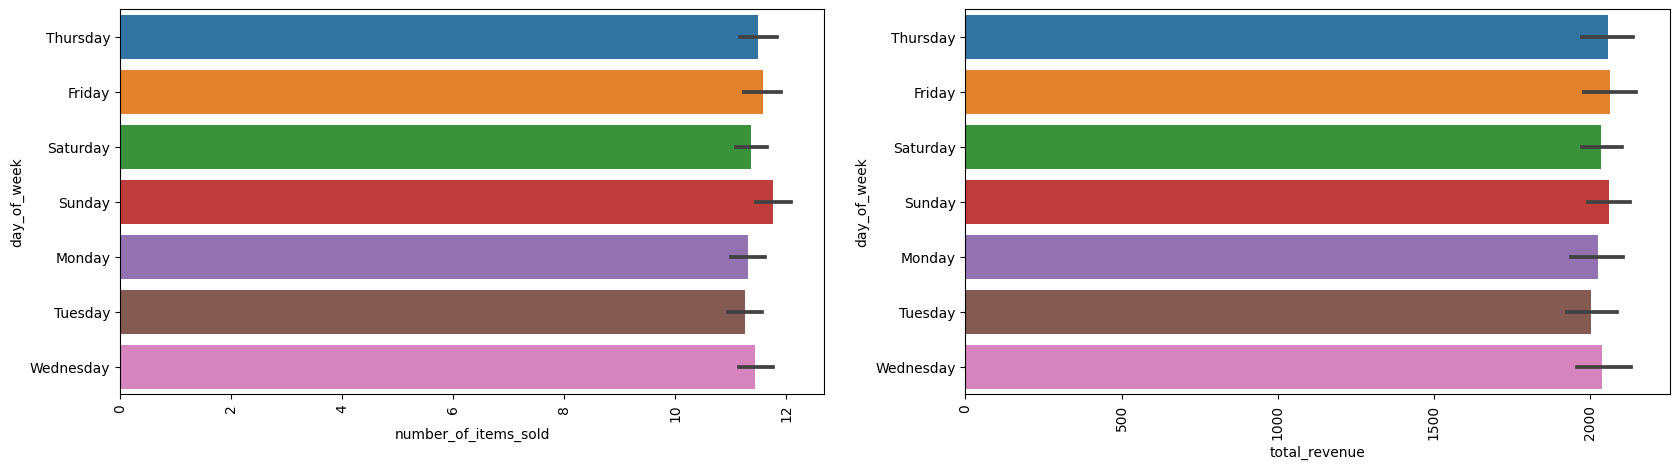

In [26]:
fig, axes = plt.subplots(figsize=(20, 5))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(data=df,x='number_of_items_sold',y='day_of_week' )

plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.barplot(data=df,x='total_revenue',y='day_of_week')


### 4)Visualizing relation between total revenue and number of items sold

<Axes: xlabel='total_revenue', ylabel='number_of_items_sold'>

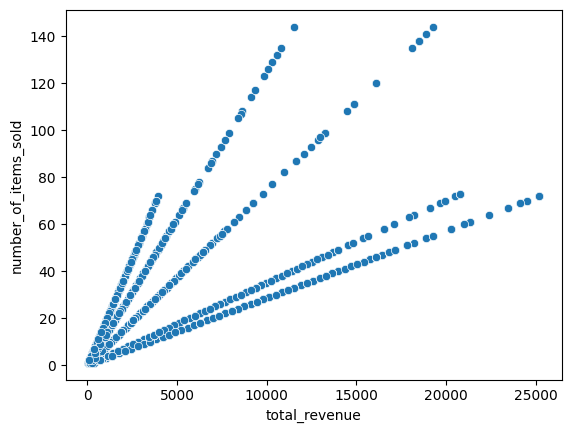

In [27]:
sns.scatterplot(data=df,x='total_revenue',y='number_of_items_sold' )


### 5)Visualizing distribution of category with number of items sold

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='number_of_items_sold', ylabel='Density'>

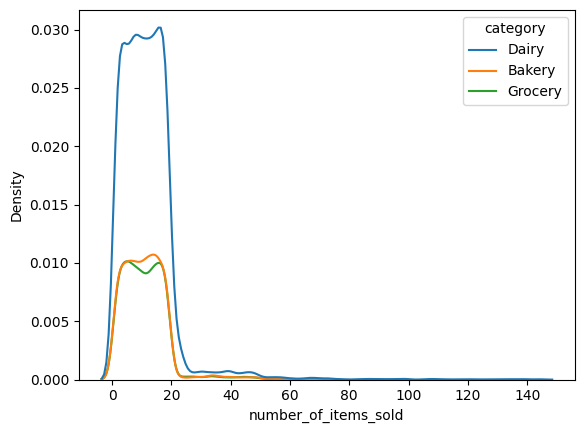

In [28]:
# dist = df.groupby('category')[['number_of_items_sold']].mean()
sns.kdeplot(x=df['number_of_items_sold'],hue=df['category'])

### 6)Analyze and visualize average sales by sales hours, months and days


In [29]:
df['sales_time'].head()

0    07:58
1    12:00
2    19:56
3    09:21
4    07:22
Name: sales_time, dtype: object

In [30]:
df['hours']=df['sales_time'].str.split(':').str[0] ### seperate hour from hour and minutes
df['hours'].head()

0    07
1    12
2    19
3    09
4    07
Name: hours, dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

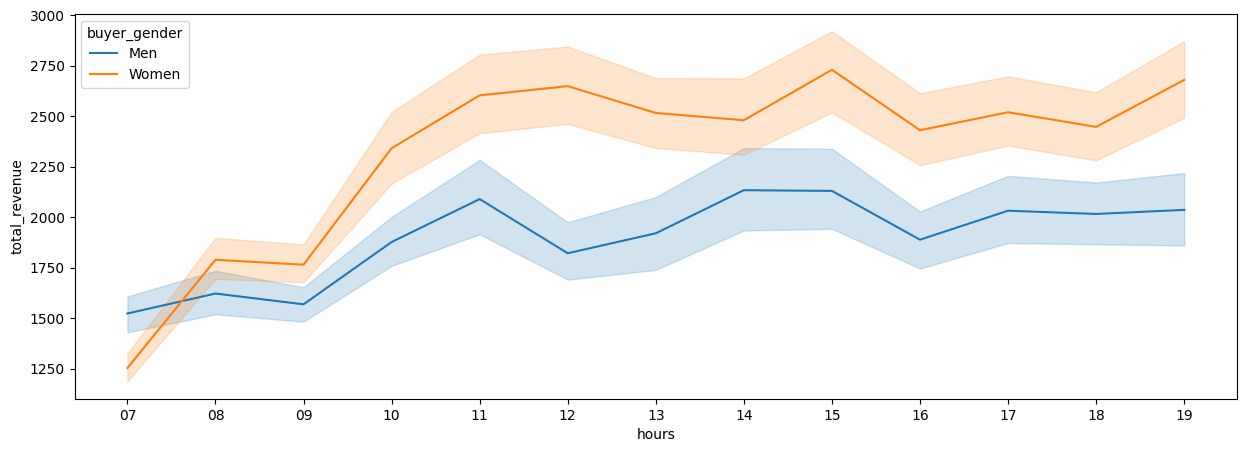

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(x='hours', y='total_revenue',data=df.sort_values('hours'),hue='buyer_gender')
plt.show()

In [32]:
df['sales_date']=df['sales_date'].astype(str)
df[['year','month', 'day']]=df['sales_date'].str.split("-",expand=True)
df.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,buyer_gender,hours,year,month,day
0,Milk packet,Dairy,80,2022-09-01,Thursday,No,18,1440,07:58,Men,07,2022,09,01
1,Bread package,Bakery,55,2022-09-01,Thursday,No,8,440,12:00,Men,12,2022,09,01
2,Butter,Dairy,285,2022-09-01,Thursday,No,15,4275,19:56,Women,19,2022,09,01
3,Milk packet,Dairy,80,2022-09-01,Thursday,No,12,960,09:21,Men,09,2022,09,01
4,Bread package,Bakery,55,2022-09-01,Thursday,No,16,880,07:22,Men,07,2022,09,01


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


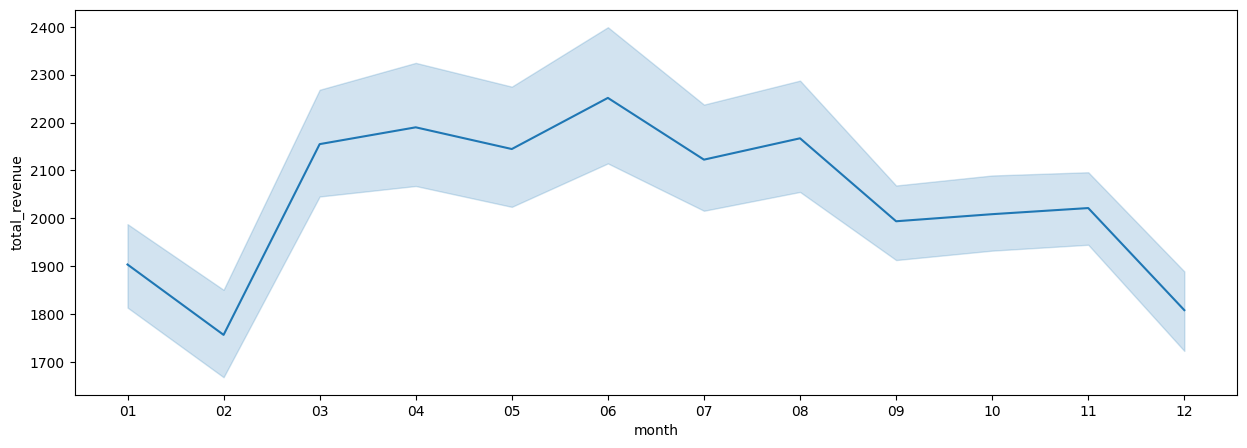

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month',y='total_revenue', data=df.sort_values('month'))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


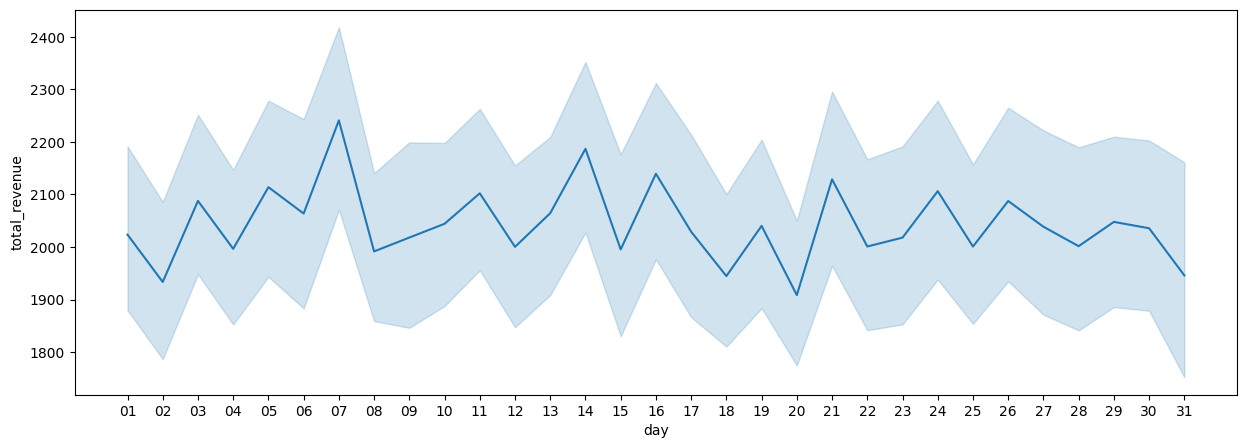

In [34]:
plt.figure(figsize=(15,5))
sns.lineplot(x='day',y='total_revenue', data=df.sort_values('day'))
plt.show()